# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Orchitiadi Ismaulana Putra
- **Email:** me@noxzym.my.id
- **ID Dicoding:** noxzym

## Menentukan Pertanyaan Bisnis

- Bagaimana performa rental sepeda dalam 2 tahun terakhir?
- Bagaimana performa rental sepeda setiap musim?
- Pada hari kerja dan hari libur, bagaimana performa rental sepeda setiap jamnya?

## Import Semua Packages/Library yang Digunakan

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [224]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [225]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### DataFrame `day_df`

In [226]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [227]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [228]:
print(f"Jumlah data null: \n{day_df.isnull().sum()}\n")
print(f"Jumlah data duplikasi: {day_df.duplicated().sum()}")

Jumlah data null: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data duplikasi: 0


**Insight:**
- Tidak ditemukan data null dan data duplikasi pada dataframe `day_df`.

#### DataFrame `hour_df`

In [229]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [230]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [231]:
print(f"Jumlah data null: \n{hour_df.isnull().sum()}\n")
print(f"Jumlah data duplikasi: {hour_df.duplicated().sum()}")

Jumlah data null: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah data duplikasi: 0


**Insight:**
- Tidak ditemukan data null dan data duplikasi pada dataframe `hour_df`.

### Cleaning Data

In [232]:
# Constanta untuk mapping dan dropping
season = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter",
}

year = {
    0: 2011,
    1: 2012,
}

month = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec",
}

weather = {
    1: "Clear",
    2: "Mist",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow",
}

drop_columns = [
    "instant",
    "holiday",
    "weekday",
    "temp",
    "atemp",
    "hum",
    "windspeed",
]

drop_columns_hour = ["casual", "registered", "weather"]

In [233]:
for df in [day_df, hour_df]:
    # merubah tipe data kolom ke datetime
    df["dteday"] = pd.to_datetime(df["dteday"])

    # merubah tipe data kolom ke category
    df["season"] = df["season"].astype("category")
    df["yr"] = df["yr"].astype("category")
    df["mnth"] = df["mnth"].astype("category")
    df["workingday"] = df["workingday"].astype("category")
    df["weathersit"] = df["weathersit"].astype("category")

    # mengganti nama kolom
    df.rename(
        columns={
            "dteday": "date",
            "yr": "year",
            "mnth": "month",
            "hr": "hour",
            "weathersit": "weather",
            "cnt": "total",
        },
        inplace=True,
    )

    # mengganti nilai pada kolom
    df["season"] = df["season"].map(season)
    df["year"] = df["year"].map(year)
    df["month"] = df["month"].map(month)
    df["weather"] = df["weather"].map(weather)
    
    # menghapus kolom yang tidak diperlukan
    df.drop(drop_columns, axis=1, inplace=True)
    if "hour" in df.columns:
        df.drop(drop_columns_hour, axis=1, inplace=True)

In [234]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   workingday  731 non-null    category      
 5   weather     731 non-null    category      
 6   casual      731 non-null    int64         
 7   registered  731 non-null    int64         
 8   total       731 non-null    int64         
dtypes: category(5), datetime64[ns](1), int64(3)
memory usage: 27.5 KB


In [235]:
day_df.head()

,date,season,year,month,workingday,weather,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,Mist,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Mist,131,670,801
2,2011-01-03,Spring,2011,Jan,1,Clear,120,1229,1349
3,2011-01-04,Spring,2011,Jan,1,Clear,108,1454,1562
4,2011-01-05,Spring,2011,Jan,1,Clear,82,1518,1600


In [236]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   year        17379 non-null  category      
 3   month       17379 non-null  category      
 4   hour        17379 non-null  int64         
 5   workingday  17379 non-null  category      
 6   total       17379 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(2)
memory usage: 476.2 KB


In [237]:
hour_df.head()

,date,season,year,month,hour,workingday,total
0,2011-01-01,Spring,2011,Jan,0,0,16
1,2011-01-01,Spring,2011,Jan,1,0,40
2,2011-01-01,Spring,2011,Jan,2,0,32
3,2011-01-01,Spring,2011,Jan,3,0,13
4,2011-01-01,Spring,2011,Jan,4,0,1


**Insight:**
- Kolom pada semua dataframe sudah memiliki tipe data yang sesuai, nama kolom yang sudah sesuai, dan nilai kolom yang sudah sesuai.

## Exploratory Data Analysis (EDA)

### DataFrame `day_df`

#### Jumlah Rental Sepeda Setiap Bulan

In [238]:
jumlah_per_bulan_setiap_tahun = day_df.groupby(["year", "month"], observed=False).agg({"total": ["sum", "max", "min", "mean"]})
jumlah_per_bulan_setiap_tahun.columns = jumlah_per_bulan_setiap_tahun.columns.droplevel()
jumlah_per_bulan_setiap_tahun.sort_values(["year", "sum"], ascending=False)

sum   max   min         mean
year month                                 
2012 Sep    218573  8714  4073  7285.766667
     Aug    214503  7865  4549  6919.451613
     Jul    203607  8173  4459  6567.967742
     Jun    202830  8120  4127  6761.000000
     Oct    198841  8156    22  6414.225806
     May    195865  8294  2843  6318.225806
     Apr    174224  7460  1027  5807.466667
     Mar    164875  8362  3194  5318.548387
     Nov    152664  6852  2277  5088.800000
     Dec    123713  6606   441  3990.741935
     Feb    103137  5062  1529  3556.448276
     Jan     96744  4521  1301  3120.774194
2011 Jun    143512  5515  3767  4783.733333
     Jul    141341  6043  3285  4559.387097
     Aug    136691  5895  1115  4409.387097
     May    135821  5805  2633  4381.322581
     Sep    127418  5423  1842  4247.266667
     Oct    123511  5511   627  3984.225806
     Nov    102167  4486  1495  3405.566667
     Apr     94870  5312   795  3162.333333
     Dec     87323  3940   705  2816.870968
     Mar     64045  3239   605  2065.967742
     Feb     48215  2927  1005  1721.964286
     Jan     38189  1985   431  1231.903226

In [239]:
jumlah_per_bulan = day_df.groupby("month", observed=False).agg({"total": ["sum", "max", "min", "mean"]}).reset_index()
jumlah_per_bulan.columns = ["month", "sum", "max", "min", "mean"]
jumlah_per_bulan.sort_values("sum", ascending=False)

,month,sum,max,min,mean
7,Aug,351194,7865,1115,5664.419355
5,Jun,346342,8120,3767,5772.366667
8,Sep,345991,8714,1842,5766.516667
6,Jul,344948,8173,3285,5563.677419
4,May,331686,8294,2633,5349.774194
9,Oct,322352,8156,22,5199.225806
3,Apr,269094,7460,795,4484.900000
10,Nov,254831,6852,1495,4247.183333
2,Mar,228920,8362,605,3692.258065
11,Dec,211036,6606,441,3403.806452


#### Jumlah Rental Sepeda Setiap Musim

In [240]:
jumlah_per_musim_setiap_tahun = day_df.groupby(["year", "season"], observed=False).agg({"total": ["sum", "max", "min", "mean"]})
jumlah_per_musim_setiap_tahun.columns = jumlah_per_musim_setiap_tahun.columns.droplevel()
jumlah_per_musim_setiap_tahun.sort_values(["year", "sum"], ascending=False)

sum   max   min         mean
year season                                 
2012 Fall    641479  8714  4073  6824.244681
     Summer  571273  8362  1027  6209.489130
     Winter  515476  8555    22  5791.865169
     Spring  321348  7836   441  3531.296703
2011 Fall    419650  6043  1115  4464.361702
     Summer  347316  5805   795  3775.173913
     Winter  326137  5511   627  3664.460674
     Spring  150000  3239   431  1666.666667

In [241]:
jumlah_per_musim = day_df.groupby("season", observed=False).agg({"total": ["sum", "max", "min", "mean"]}).reset_index()
jumlah_per_musim.columns = ["season", "sum", "max", "min", "mean"]
jumlah_per_musim.sort_values("sum", ascending=False)

,season,sum,max,min,mean
2,Fall,1061129,8714,1115,5644.303191
1,Summer,918589,8362,795,4992.331522
3,Winter,841613,8555,22,4728.162921
0,Spring,471348,7836,431,2604.132597


#### Jumlah Rental Sepeda pada Kondisi Cuaca Tertentu

In [242]:
jumlah_per_cuaca_setiap_tahun = day_df.groupby(["year", "weather"], observed=False).agg({"total": ["sum", "max", "min", "mean"]})
jumlah_per_cuaca_setiap_tahun.columns = jumlah_per_cuaca_setiap_tahun.columns.droplevel()
jumlah_per_cuaca_setiap_tahun.sort_values(["year", "sum"], ascending=False)

sum   max   min         mean
year weather                                          
2012 Clear            1422885  8714  1529  6003.734177
     Mist              613934  8362   920  4991.333333
     Light Rain/Snow    12757  4639    22  2126.166667
2011 Clear             835067  5923   431  3694.986726
     Mist              382924  6043   605  3088.096774
     Light Rain/Snow    25112  2765   506  1674.133333

In [243]:
jumlah_per_cuaca = day_df.groupby("weather", observed=False).agg({"total": ["sum", "max", "min", "mean"]}).reset_index()
jumlah_per_cuaca.columns = ["weather", "sum", "max", "min", "mean"]
jumlah_per_cuaca.sort_values("sum", ascending=False)

,weather,sum,max,min,mean
0,Clear,2257952,8714,431,4876.786177
1,Mist,996858,8362,605,4035.862348
2,Light Rain/Snow,37869,4639,22,1803.285714


#### **Insight**:
- Tahun 2012 memiliki jumlah rental sepeda yang lebih tinggi dibandingkan tahun 2011.
- Pada tahun 2012, bulan September adalah bulan dengan jumlah rental sepeda tertinggi dan bulan Januari adalah bulan dengan jumlah rental sepeda terendah.
- Pada tahun 2011, bulan Juni adalah bulan dengan jumlah rental sepeda tertinggi dan bulan Januari adalah bulan dengan jumlah rental sepeda terendah.
- Secara keseluruhan, bulan Agustus adalah bulan dengan jumlah rental sepeda tertinggi dan bulan Januari adalah bulan dengan jumlah rental sepeda terendah.
- Musim gugur menjadi musim dengan jumlah rental sepeda tertinggi dan musim semi menjadi musim dengan jumlah rental sepeda terendah.
- Cuaca yang cerah menjadi cuaca dengan jumlah rental sepeda tertinggi dibandingkan cuaca lainnya.

### DataFrame `hour_df`

In [244]:
filter_workingday = hour_df[hour_df["workingday"] == 1]
filter_holiday = hour_df[hour_df["workingday"] == 0]

In [245]:
jumlah_per_jam_workingday = filter_workingday.groupby(["hour"], observed=False).agg({"total": ["sum", "max", "min", "mean"]}).reset_index()
jumlah_per_jam_workingday.columns = ["hour", "sum", "max", "min", "mean"]
jumlah_per_jam_workingday[jumlah_per_jam_workingday["max"] >= 500].sort_values("max", ascending=False)

,hour,sum,max,min,mean
18,18,245129,977,26,492.226908
17,17,262120,976,26,525.290581
8,8,236595,839,31,477.006048
19,19,173504,743,18,348.401606
14,14,91419,651,12,183.572289
16,16,146268,634,13,293.122244
15,15,100263,601,13,201.331325
7,7,144144,596,18,290.612903
20,20,124360,567,23,249.718876


In [246]:
jumlah_per_jam_holiday = filter_holiday.groupby(["hour"], observed=False).agg({"total": ["sum", "max", "min", "mean"]}).reset_index()
jumlah_per_jam_holiday.columns = ["hour", "sum", "max", "min", "mean"]
jumlah_per_jam_holiday[jumlah_per_jam_holiday["max"] >= 500].sort_values("max", ascending=False)

,hour,sum,max,min,mean
16,16,81480,783,11,352.727273
12,12,84606,776,32,366.259740
13,13,86101,760,30,372.731602
14,14,84233,750,23,364.645022
15,15,82886,750,7,358.813853
17,17,74740,731,15,323.549784
18,18,64643,676,23,281.056522
11,11,72838,663,27,315.316017
8,8,24406,597,5,105.653680
21,21,32674,584,7,142.060870


#### **Insight:**
- Pada hari kerja (bukan hari libur), jumlah rental sepeda terbanyak berkisar pada jam 7 pagi - 10 malam dengan puncaknya pada jam 6 sore
- Pada hari libur, jumlah rental sepeda terbanyak berkisar pada jam 8 pagi - 10 malam dengan puncaknya pada jam 4 sore

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Rental Sepeda dalam 2 Tahun Terakhir?

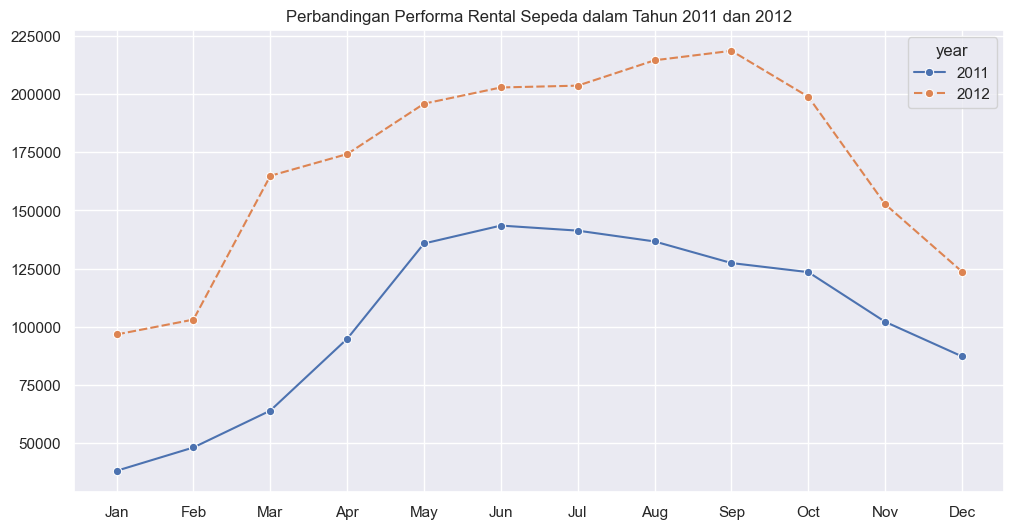

In [247]:
# Mengubah bentuk data frame
reshaped = jumlah_per_bulan_setiap_tahun.reset_index().pivot(index="month", columns="year", values="sum")

# Memvisualisasikan data menggunakan line plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=reshaped, marker="o")
plt.title("Perbandingan Performa Rental Sepeda dalam Tahun 2011 dan 2012")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

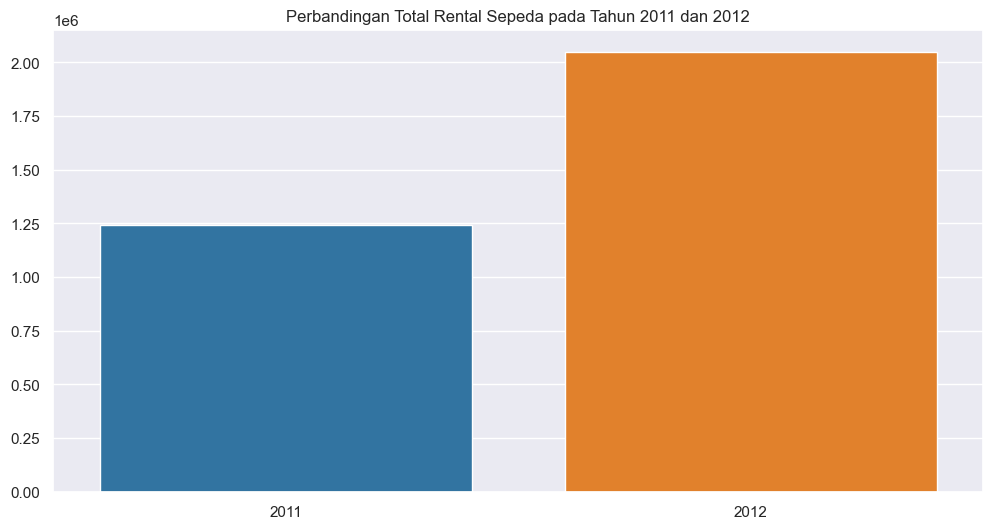

In [248]:
# Mengelompokkan data berdasarkan tahun
grouped_df = day_df.groupby("year", observed=False)

# Menghitung total sepeda yang dirental
aggregate_df = grouped_df.agg({"total": "sum"}).reset_index()

# Memvisualisasikan data menggunakan bar plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data=aggregate_df, x="year", y="total", hue="year", legend=False, palette=["tab:blue", "tab:orange"])
plt.title("Perbandingan Total Rental Sepeda pada Tahun 2011 dan 2012")
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Insight:**
- Terjadi peningkatan jumlah rental sepeda pada tahun 2012 sebanyak 64.88% dibandingkan tahun sebelumnya.
- Tahun 2011 menunjukkan tren peningkatan dan penurunan yang lebih stabil dibandingkan 2012, yang memiliki perubahan drastis terutama di awal tahun dan akhir tahun.
- Penurunan tajam pada akhir tahun (September–Desember) di tahun 2012 dapat menjadi area perhatian, mungkin karena faktor eksternal seperti cuaca buruk ataupun kebutuhan pelanggan yang berkurang.

### Pertanyaan 2: Bagaimana Performa Rental Sepeda Setiap Musim?

In [249]:
# Mengelompokkan data berdasarkan tahun dan bulan
grouped_df = day_df.groupby(["year", "season"], observed=False)

# Menghitung total sepeda yang dirental berdasarkan tipe user
aggregate_df = grouped_df.agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

aggregate_df

,year,season,casual,registered
0,2011,Spring,21425,128575
1,2011,Summer,77564,269752
2,2011,Fall,95450,324200
3,2011,Winter,52813,273324
4,2012,Spring,39197,282151
5,2012,Summer,125958,445315
6,2012,Fall,130641,510838
7,2012,Winter,76969,438507


In [250]:
data_2011 = aggregate_df[aggregate_df["year"] == 2011]
data_2011

,year,season,casual,registered
0,2011,Spring,21425,128575
1,2011,Summer,77564,269752
2,2011,Fall,95450,324200
3,2011,Winter,52813,273324


In [251]:
data_2012 = aggregate_df[aggregate_df["year"] == 2012]
data_2012

,year,season,casual,registered
4,2012,Spring,39197,282151
5,2012,Summer,125958,445315
6,2012,Fall,130641,510838
7,2012,Winter,76969,438507


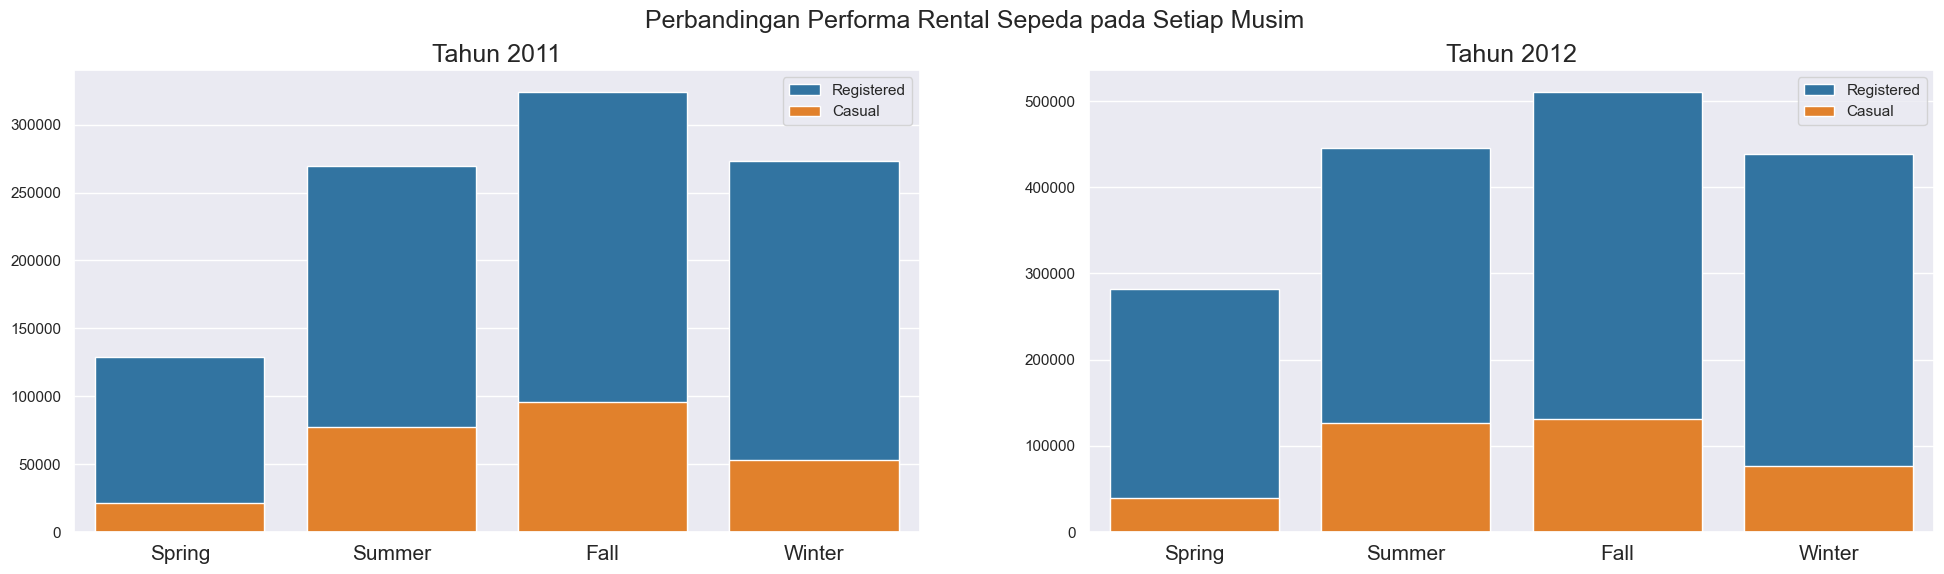

In [252]:
# Memvisualisasikan data menggunakan bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

for i in range(2):
    sns.barplot(data=data_2011 if i % 2 == 0 else data_2012, x="season", y="registered", color="tab:blue", label="Registered", ax=ax[i])
    sns.barplot(data=data_2011 if i % 2 == 0 else data_2012, x="season", y="casual", color="tab:orange", label="Casual", ax=ax[i])
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title("Tahun 201" + str(i + 1), fontsize=18)
    ax[i].tick_params(axis ='x', labelsize=15)

sns.set_theme(style="darkgrid")
plt.suptitle("Perbandingan Performa Rental Sepeda pada Setiap Musim", fontsize=18)
plt.show()

**Insight:**
- Musim gugur menjadi musim dengan jumlah rental sepeda tertinggi dan musim semi menjadi musim dengan jumlah rental sepeda terendah pada setiap tahunnya.
- Tahun 2012 menunjukkan peningkatan jumlah rental sepeda pada setiap musimnya dibandingkan tahun 2011.
- Perbedaan member dan non-member pada 2 tahun terakhir relatif stabil pada setiap musimnya.

### Pertanyaan 3: Pada Hari Kerja dan Hari Libur, Bagaimana Performa Rental Sepeda Setiap Jam dalam 2 Tahun Terakhir?

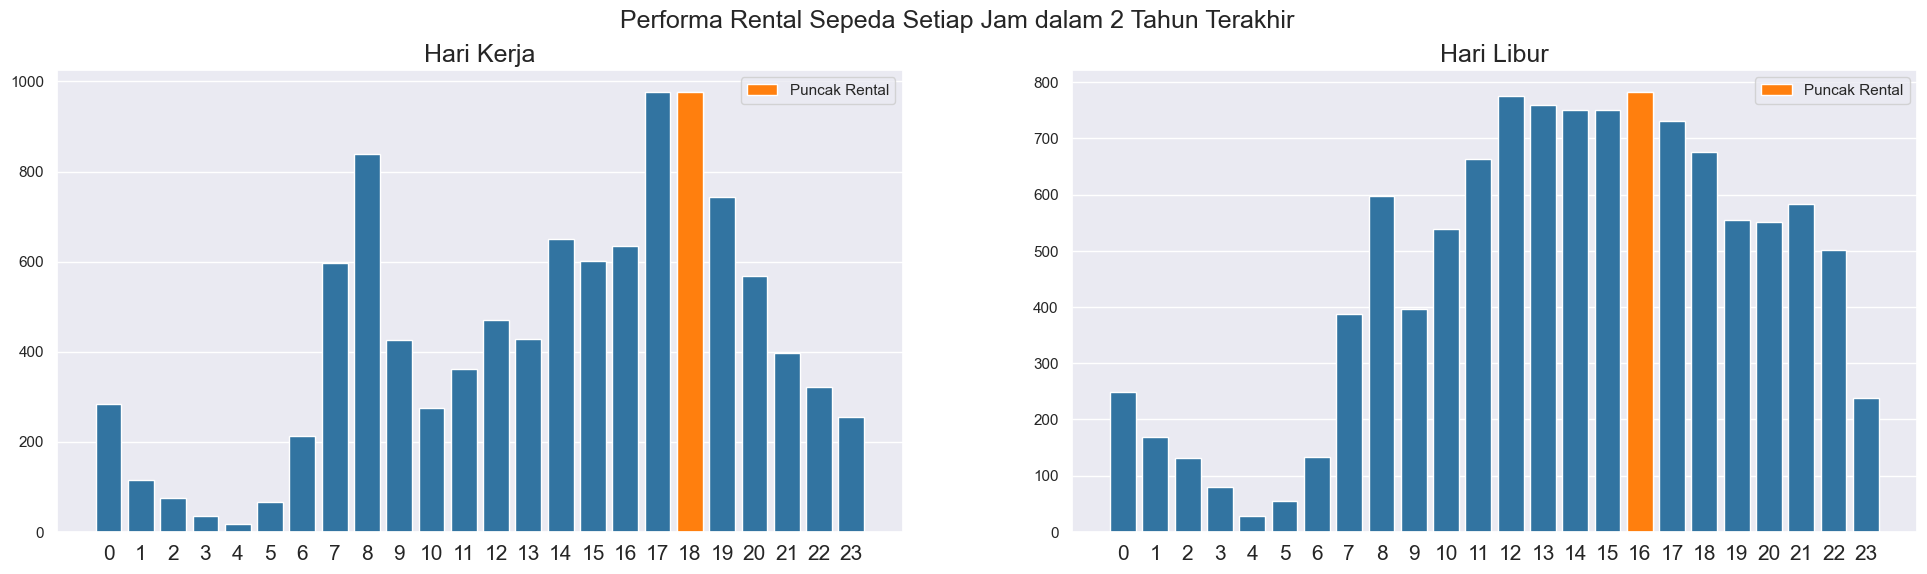

In [253]:
# Memvisualisasikan data menggunakan bar plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

for i in range(2):
    data = jumlah_per_jam_workingday if i % 2 == 0 else jumlah_per_jam_holiday
    sns.barplot(data=data, x="hour", y="max", color="tab:blue", ax=ax[i])
    ax[i].bar(data["max"].idxmax(), height=data["max"].max(), color="tab:orange", label="Puncak Rental")
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].legend()
    ax[i].set_title("Hari Kerja" if i % 2 == 0 else "Hari Libur", fontsize=18)
    ax[i].tick_params(axis ='x', labelsize=15)

sns.set_theme(style="darkgrid")
plt.suptitle("Performa Rental Sepeda Setiap Jam dalam 2 Tahun Terakhir", fontsize=18)
plt.show()

**Insight:**
- Secara keseluruhan, aktivitas pada seluruh rental sepeda relatif stabil pada hari libur dibandingkan hari kerja, yang menunjukkan bahwa pengguna cenderung menyewa sepeda untuk kegiatan rekreasi atau berlibur.
- Pada hari kerja, aktivitas rental sepeda dimulai dari pukul 07.00-09.00 dilanjut pukul 16.00-19.00 dengan puncaknya pada jam 5 dan 6 sore.
- Pada hari libur, Puncak rental terjadi di pagi hingga sore hari, sekitar pukul 11.00-16.00 dengan pola rental lebih stabil disepanjang hari, terutama dari pukul 12.00 hingga 17.00, sebelum menurun di malam hari.

## Conclusion

### Bagaimana performa rental sepeda dalam 2 tahun terakhir?

- Terjadi peningkatan jumlah rental sepeda pada tahun 2012 sebanyak 64.88% dibandingkan tahun sebelumnya.
- Tahun 2011 menunjukkan tren peningkatan dan penurunan yang lebih stabil dibandingkan 2012, yang memiliki perubahan drastis terutama di awal tahun dan akhir tahun.
- Penurunan tajam pada akhir tahun (September–Desember) di tahun 2012 dapat menjadi area perhatian, mungkin karena faktor eksternal seperti cuaca buruk ataupun kebutuhan pelanggan yang berkurang.

#### Saran Peningkatan Performa / Pendapatan

- Menawarkan program loyalitas akhir tahun agar pengguna tetap tertarik menyewa sepeda.
- Menjalin kerja sama dengan kafe, hotel, atau tempat wisata untuk menawarkan penyewaan sepeda sebagai bagian dari paket layanan mereka.

### Bagaimana performa rental sepeda setiap musim?

- Musim gugur menjadi musim dengan jumlah rental sepeda tertinggi dan musim semi menjadi musim dengan jumlah rental sepeda terendah pada setiap tahunnya.
- Tahun 2012 menunjukkan peningkatan jumlah rental sepeda pada setiap musimnya dibandingkan tahun 2011.
- Perbedaan member dan non-member pada 2 tahun terakhir relatif stabil pada setiap musimnya.

#### Saran Peningkatan Performa / Pendapatan

- Memastikan sepeda dalam kondisi prima untuk menyambut musim gugur supaya pengguna merasa nyaman .
- Menawarkan diskon atau promosi khusus pada musim semi untuk menarik lebih banyak pelanggan.
- Menawarkan program loyalitas berbasis poin yang dapat ditukar dengan diskon atau hadiah pada member.
- Menyediakan uji coba gratis dengan harga lebih kompetitif bagi pengguna baru agar mereka tertarik menjadi anggota.

### Pada hari kerja dan hari libur, bagaimana performa rental sepeda setiap jamnya?

- Secara keseluruhan, aktivitas pada seluruh rental sepeda relatif stabil pada hari libur dibandingkan hari kerja, yang menunjukkan bahwa pengguna cenderung menyewa sepeda untuk kegiatan rekreasi atau berlibur.
- Pada hari kerja, aktivitas rental sepeda dimulai dari pukul 07.00-09.00 dilanjut pukul 16.00-19.00 dengan puncaknya pada jam 5 dan 6 sore.
- Pada hari libur, Puncak rental terjadi di siang hingga sore hari, sekitar pukul 13.00-16.00 dengan pola rental lebih stabil disepanjang hari, terutama dari pukul 9.00 hingga 16.00, sebelum menurun di malam hari.

#### Saran Peningkatan Performa / Pendapatan

- Menawarkan langganan khusus bagi pekerja atau pelajar yang sering menggunakan sepeda untuk commuting.
- Kerja sama dengan hotel, taman rekreasi, atau tempat wisata untuk menyediakan penyewaan sepeda sebagai bagian dari layanan mereka.

## Analisis Lanjutan (Opsional)

### Clustering - Manual Grouping: Tren Penyewaan Sepeda Berdasarkan Waktu dan Musim dalam 2 Tahun Terakhir

In [254]:
def time_category(hour):
    if 6 <= hour < 10:
        return "Morning"
    elif 10 <= hour < 16:
        return "Afternoon"
    elif 16 <= hour < 20:
        return "Evening"
    else:
        return "Night"
    
time_categories = ["Morning", "Afternoon", "Evening", "Night"]

In [255]:
hour_df["time_category"] = hour_df["hour"].apply(time_category)
hour_df["time_category"] = pd.Categorical(hour_df["time_category"], categories=time_categories, ordered=True)
time_season_mean = hour_df.groupby(["time_category", "season"], observed=False)["total"].mean().unstack()

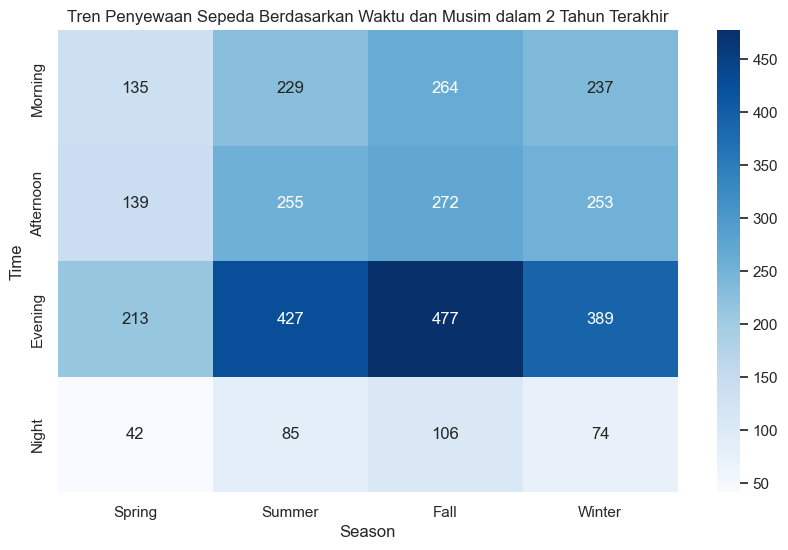

In [256]:
plt.figure(figsize=(10, 6))
sns.heatmap(time_season_mean, cmap="Blues", annot=True, fmt=".0f")
plt.title("Tren Penyewaan Sepeda Berdasarkan Waktu dan Musim dalam 2 Tahun Terakhir")
plt.xlabel("Season")
plt.ylabel("Time")
plt.show()

## Conclusion

### Bagaimana performa rental sepeda dalam 2 tahun terakhir?

- Terjadi peningkatan jumlah rental sepeda pada tahun 2012 sebanyak 64.88% dibandingkan tahun sebelumnya.
- Tahun 2011 menunjukkan tren peningkatan dan penurunan yang lebih stabil dibandingkan 2012, yang memiliki perubahan drastis terutama di awal tahun dan akhir tahun.
- Penurunan tajam pada akhir tahun (September–Desember) di tahun 2012 dapat menjadi area perhatian, mungkin karena faktor eksternal seperti cuaca buruk ataupun kebutuhan pelanggan yang berkurang.

### Bagaimana performa rental sepeda setiap musim?

- Musim gugur menjadi musim dengan jumlah rental sepeda tertinggi dan musim semi menjadi musim dengan jumlah rental sepeda terendah pada setiap tahunnya.
- Tahun 2012 menunjukkan peningkatan jumlah rental sepeda pada setiap musimnya dibandingkan tahun 2011.
- Perbedaan member dan non-member pada 2 tahun terakhir relatif stabil pada setiap musimnya.

### Pada hari kerja dan hari libur, bagaimana performa rental sepeda setiap jamnya?

- Secara keseluruhan, aktivitas pada seluruh rental sepeda relatif stabil pada hari libur dibandingkan hari kerja, yang menunjukkan bahwa pengguna cenderung menyewa sepeda untuk kegiatan rekreasi atau berlibur.
- Pada hari kerja, aktivitas rental sepeda dimulai dari pukul 07.00-09.00 dilanjut pukul 16.00-19.00 dengan puncaknya pada jam 5 dan 6 sore.
- Pada hari libur, Puncak rental terjadi di siang hingga sore hari, sekitar pukul 13.00-16.00 dengan pola rental lebih stabil disepanjang hari, terutama dari pukul 9.00 hingga 16.00, sebelum menurun di malam hari.

### Saran Peningkatan Performa / Pendapatan

Untuk meningkatkan performa dan pendapatan, penyedia rental sepeda dapat menawarkan program khusus di akhir tahun agar pengguna tetap tertarik menyewa, serta memberikan diskon atau promosi pada musim semi untuk menarik lebih banyak pelanggan. Selain itu, memastikan sepeda dalam kondisi prima menjelang musim gugur akan meningkatkan kenyamanan pengguna. Menyediakan langganan khusus bagi pekerja atau pelajar yang sering menggunakan sepeda untuk perjalanan sehari-hari juga dapat meningkatkan loyalitas pelanggan. Terakhir, menjalin kerja sama dengan hotel, taman rekreasi, atau tempat wisata dapat membuka peluang baru dengan menyediakan penyewaan sepeda sebagai bagian dari layanan mereka.

## Generate Dashboard Data

In [257]:
day_df.to_csv("./dashboard/day_data.csv", index=False)
hour_df.to_csv("./dashboard/hour_data.csv", index=False)